# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

response_json=[]
skipped_cities = []

print("Beginning Data Retrieval")
print("-----------------------------")
for x in range(len(cities)):
    query_url = base_url + "appid=" + api_key + "&units=imperial" + "&q=" + cities[x]
    response = requests.get(query_url).json()
        
    if  response['cod'] == "404":
        print(f"City not found. Skipping...")
        skipped_cities.append(cities[x])
        
    else:
        print(f"Processing Record {x}| {cities[x]}")
        response_json.append(response)

print("-----------------------------")
print(f"Data Retrieval Complete ({len(response_json)} retrieved, {len(skipped_cities)} skipped)")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 0| barrow
Processing Record 1| tuktoyaktuk
Processing Record 2| camacari
Processing Record 3| hilo
Processing Record 4| pinheiro
Processing Record 5| busselton
Processing Record 6| jiuquan
Processing Record 7| albany
City not found. Skipping...
Processing Record 9| hohhot
Processing Record 10| wanlaweyn
Processing Record 11| chuy
City not found. Skipping...
Processing Record 13| arraial do cabo
Processing Record 14| poum
Processing Record 15| souillac
Processing Record 16| havoysund
Processing Record 17| redcliffe
Processing Record 18| rikitea
Processing Record 19| kahului
Processing Record 20| avarua
Processing Record 21| mbumi
Processing Record 22| tazovskiy
Processing Record 23| mandalgovi
Processing Record 24| rawson
Processing Record 25| bredasdorp
Processing Record 26| tommot
Processing Record 27| whitecourt
Processing Record 28| punta arenas
Processing Record 29| upernavik
Processing Record 30| provideniya


Processing Record 257| yulara
Processing Record 258| high rock
Processing Record 259| amapa
Processing Record 260| la ronge
Processing Record 261| sinnamary
Processing Record 262| lasa
Processing Record 263| dingle
Processing Record 264| washington
Processing Record 265| alta floresta
Processing Record 266| trofors
Processing Record 267| tasiilaq
City not found. Skipping...
Processing Record 269| sovetskiy
City not found. Skipping...
Processing Record 271| ambilobe
City not found. Skipping...
Processing Record 273| lebu
Processing Record 274| khani
City not found. Skipping...
Processing Record 276| hailar
Processing Record 277| segou
Processing Record 278| cabo san lucas
Processing Record 279| barysh
Processing Record 280| dhidhdhoo
City not found. Skipping...
Processing Record 282| mackay
Processing Record 283| loandjili
Processing Record 284| rafaela
Processing Record 285| solnechnyy
Processing Record 286| imbituba
Processing Record 287| santa marta
Processing Record 288| boda
Proces

Processing Record 517| la sarre
Processing Record 518| atar
Processing Record 519| yumen
Processing Record 520| takayama
Processing Record 521| maceio
City not found. Skipping...
Processing Record 523| xixiang
Processing Record 524| ewo
City not found. Skipping...
Processing Record 526| abnub
Processing Record 527| zawiercie
Processing Record 528| toktogul
Processing Record 529| celestun
Processing Record 530| daru
Processing Record 531| wajir
Processing Record 532| quelimane
Processing Record 533| baghmara
Processing Record 534| hornepayne
Processing Record 535| havre-saint-pierre
Processing Record 536| lityn
Processing Record 537| tambun
Processing Record 538| ngunguru
Processing Record 539| victor harbor
Processing Record 540| doha
Processing Record 541| acapulco
Processing Record 542| ntungamo
Processing Record 543| ongandjera
Processing Record 544| baker city
Processing Record 545| sampit
Processing Record 546| maiduguri
Processing Record 547| marica
Processing Record 548| esperan

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
city =[]
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

for x in response_json:
    city.append(x['name'])
    cloudiness.append(x['clouds']['all'])
    country.append(x['sys']['country'])
    date.append(x['dt'])
    humidity.append(x['main']['humidity'])
    lat.append(x['coord']['lat'])
    lng.append(x['coord']['lon'])
    max_temp.append(x['main']['temp_max'])
    wind_speed.append(x['wind']['speed'])
city_data = ({
    "City" : city,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Lat" : lat,
    "Lng" : lng,
    "Max Temp" : max_temp,
    "Wind Speed" : wind_speed
})

df_city_data = pd.DataFrame(city_data)
df_city_data.count()


City          546
Cloudiness    546
Country       546
Date          546
Humidity      546
Lat           546
Lng           546
Max Temp      546
Wind Speed    546
dtype: int64

In [8]:
df_city_data.to_csv('city_weather_data')
df_city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Barrow,20,AR,1544318036,31,-38.31,-60.23,81.04,18.72
1,Tuktoyaktuk,90,CA,1544313600,92,69.44,-133.03,6.80,23.04
2,Camacari,40,BR,1544317200,83,-12.70,-38.32,82.40,9.17
3,Hilo,20,US,1544313180,56,19.71,-155.08,80.06,11.41
4,Pinheiro,44,BR,1544318037,75,-2.53,-45.09,79.91,4.18


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

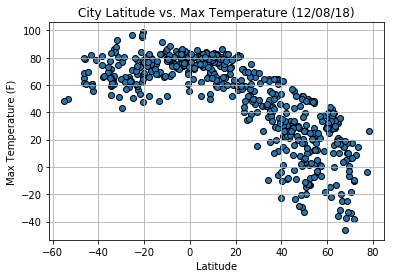

In [9]:
plt.scatter(x=df_city_data["Lat"],y=df_city_data["Max Temp"],edgecolors='black')
plt.grid()
plt.title("City Latitude vs. Max Temperature (12/08/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("Images/LatVsTemp.png")
plt.show()


#### Latitude vs. Humidity Plot

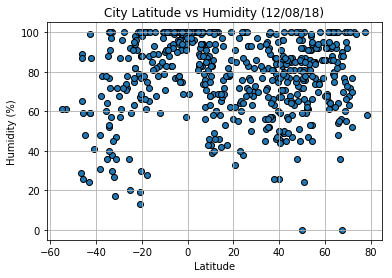

In [10]:
plt.scatter(x=df_city_data["Lat"],y=df_city_data["Humidity"],edgecolors='black')
plt.grid()
plt.title("City Latitude vs Humidity (12/08/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Images/LatVsHumidity.png")
plt.show()


#### Latitude vs. Cloudiness Plot

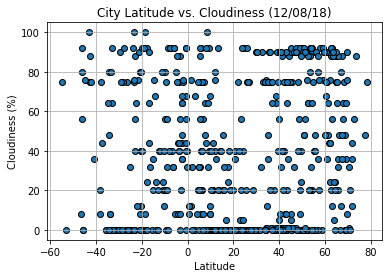

In [11]:
plt.scatter(x=df_city_data["Lat"],y=df_city_data["Cloudiness"],edgecolors='black')
plt.grid()
plt.title("City Latitude vs. Cloudiness (12/08/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Images/LatVsCloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

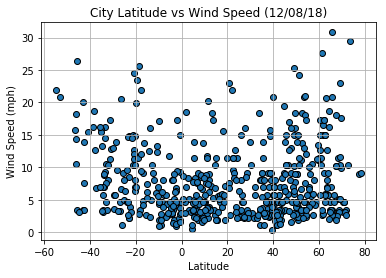

In [12]:
plt.scatter(x=df_city_data["Lat"],y=df_city_data["Wind Speed"], edgecolors='black')
plt.grid()
plt.title("City Latitude vs Wind Speed (12/08/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Images/LatVsWind.png")
plt.show()

Observable Trends:

1. Cities at the equator and close to the equator have the highest max temperature. As cities get further and further away form the equator the max temperature drops. The max temperature drops much greater as you go north of the equator compared to going south of the equator. This makes sense because it is currently winter in the norther hemisphere while it is summer in the southern hemisphere.

2. The majority of cities have humidity of 60%-100%. There are a small portion of cities in the 20%-60% humidity range. There are only a few outlier cities that have below 20% humidity and these outlier cities are away from the equator.

3. There is no real correlation or trend when comparing city latitude to cloudiness. The cloudiness level is scattered at any latitude. Some cities have no cloudiness while others have 100% cloudiness while the rest are inbetween. It does not seem like cloudiness has any relation to latitude.